In [1]:
from tracker import Tracker
import matplotlib.pyplot as plt

d:\OneDrive\Desktop\All\miniconda3\envs\magnetlab\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\OneDrive\Desktop\All\miniconda3\envs\magnetlab\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
d:\OneDrive\Desktop\All\miniconda3\envs\magnetlab\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\OneDrive\Desktop\All\

In [2]:
tracker = Tracker(root_folder="D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\",
                  detection_model="models\detection\weights",
                  scale=0.294,
                  fps = 56.95)

In [3]:
alpha = 0.5
beta = 1 - alpha
cutoff = 0.999

1/1 [==============================] - 10s 10s/step


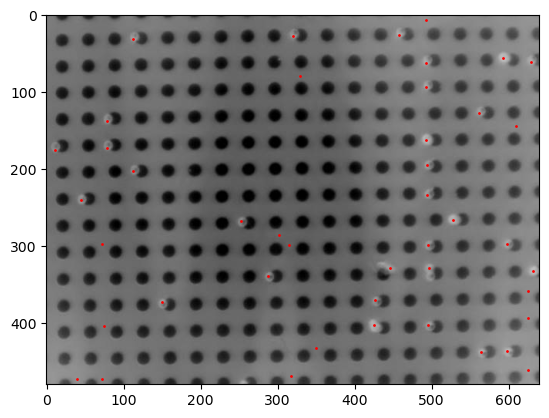

In [4]:
sample = tracker.random_frame()
sample_detections = tracker.detect_frame(sample, alpha=alpha, beta=beta, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [ ]:
tracker.detect_all(alpha=alpha, beta=beta, cutoff=cutoff)

In [3]:
tracker.track_all(min_duration=20, min_displacement=50, search_range=25, memory=0)

Frame 154: 44 trajectories present.


In [3]:
f_to_v = tracker.freq_to_v()
v_vs_f = tracker.compute_stats(f_to_v)

<Axes: title={'center': 'V vs F'}, xlabel='Frequency (Hz)', ylabel='Mean velocity (um/s)'>

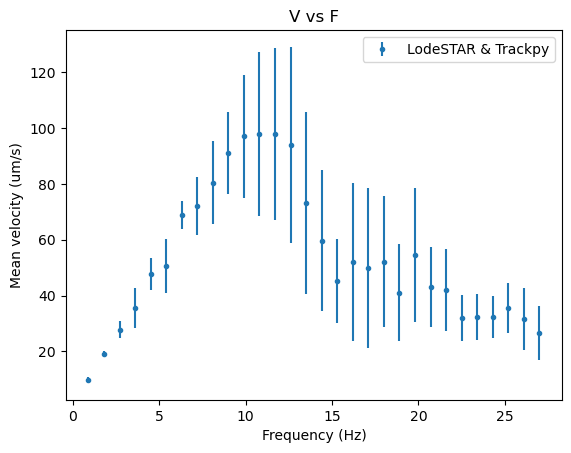

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
tracker.plot_v_vs_f(ax, v_vs_f)

<Axes: title={'center': 'V vs F'}, xlabel='Frequency (Hz)', ylabel='Mean velocity (um/s)'>

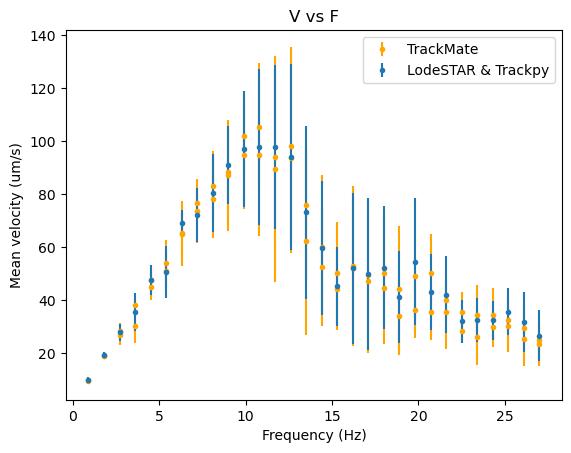

In [11]:
import pandas as pd
old_result = pd.read_csv("D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\dia_range_2_12.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(old_result["actual_frequency"], old_result["mean_velocity"], 
             yerr=old_result["standard_deviation"], fmt='.', color="orange", label="TrackMate")
tracker.plot_v_vs_f(ax, v_vs_f)